### Data Prep -- data stack

In [10]:
# stack the original int16 bands directly (NO scaling), replace -9999 with 0, and set T2m in °C

import os
import numpy as np
import rasterio

HLS_DIR = r"C:\Users\carellano.LEGION5PRO-O3OB\Documents\GitHub\SR_dataaccess\data_hls_graz"
PREFIX = "HLS.L30.T33TWM.2022162T094544.v2.0"
bands = ["B02","B03","B04","B05","B06","B07"]

out_dir = os.path.join(HLS_DIR, "model_inputs_dn")
os.makedirs(out_dir, exist_ok=True)

band_arrays = []
profile = None

for i, band in enumerate(bands):
    path = os.path.join(HLS_DIR, f"{PREFIX}.{band}.tif")
    with rasterio.open(path) as src:
        arr = src.read(1).astype(np.float32)

        # Replace nodata (-9999) with 0 as expected by many pipelines
        arr[arr == src.nodata] = 0.0

        band_arrays.append(arr)

        if i == 0:
            profile = src.profile
            height, width = src.height, src.width

# Band 7: T2m in °C (placeholder for now)
t2m_c = 20.0
band_arrays.append(np.full((height, width), t2m_c, dtype=np.float32))

stack = np.stack(band_arrays, axis=0)  # (7, H, W)

profile.update(count=7, dtype="float32", nodata=None)

out_path = os.path.join(out_dir, f"{PREFIX}.inputs.tif")
with rasterio.open(out_path, "w", **profile) as dst:
    dst.write(stack)

print("✅ Wrote DN-scale input:", out_path)

for b in range(7):
    a = stack[b]
    print(b+1, "min/max/mean:", float(np.min(a)), float(np.max(a)), float(np.mean(a)))


✅ Wrote DN-scale input: C:\Users\carellano.LEGION5PRO-O3OB\Documents\GitHub\SR_dataaccess\data_hls_graz\model_inputs_dn\HLS.L30.T33TWM.2022162T094544.v2.0.inputs.tif
1 min/max/mean: -2623.0 13689.0 1127.07763671875
2 min/max/mean: -1630.0 15047.0 1382.787841796875
3 min/max/mean: -1437.0 16662.0 1263.0029296875
4 min/max/mean: -605.0 16101.0 3818.938720703125
5 min/max/mean: -262.0 19565.0 2199.087890625
6 min/max/mean: -715.0 20593.0 1354.35693359375
7 min/max/mean: 20.0 20.0 20.0


In [ ]:
## data check indiv from jose SR_access

import rasterio, numpy as np, os

HLS_DIR = r"C:\Users\carellano.LEGION5PRO-O3OB\Documents\GitHub\SR_dataaccess\data_hls_graz"
PREFIX = "HLS.L30.T33TWM.2022162T094544.v2.0"
b02_path = os.path.join(HLS_DIR, f"{PREFIX}.B02.tif")

with rasterio.open(b02_path) as src:
    a = src.read(1)
    print("dtype:", a.dtype)
    print("min/max/mean:", float(np.nanmin(a)), float(np.nanmax(a)), float(np.nanmean(a)))
    print("nodata:", src.nodata)
    print("tags sample:", {k: src.tags().get(k) for k in ["scale_factor","add_offset","SCALE_FACTOR","ADD_OFFSET"]})


dtype: int16
min/max/mean: -9999.0 13689.0 1055.701721834035
nodata: -9999.0
tags sample: {'scale_factor': '0.0001', 'add_offset': '0.0', 'SCALE_FACTOR': None, 'ADD_OFFSET': None}


#### Loading the Model

In [ ]:
#import sys

#!{sys.executable} -m pip install -U "terratorch==1.0.0" "lightning==2.2.5" "jsonargparse==4.27.7"


   ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
   ---------------------------------------- 2.0/2.0 MB 18.3 MB/s  0:00:00
   ---------------------------------------- 0.0/9.7 MB ? eta -:--:--
   ------------------ --------------------- 4.5/9.7 MB 22.4 MB/s eta 0:00:01
   ------------------------------------- -- 9.2/9.7 MB 22.9 MB/s eta 0:00:01
   ---------------------------------------- 9.7/9.7 MB 21.6 MB/s  0:00:00
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   ---------------------------------------- 2.8/2.8 MB 20.4 MB/s  0:00:00
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 1.4/1.4 MB 18.5 MB/s  0:00:00
   ---------------------------------------- 0.0/3.5 MB ? eta -:--:--
   ---------------------------------------- 3.5/3.5 MB 20.4 MB/s  0:00:00
   ---------------------------------------- 0.0/798.3 kB ? eta -:--:--
   ---------------------------------------- 798.3/798.3 kB 1

  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.


In [ ]:
#import sys
#!{sys.executable} -m pip uninstall -y torch torchvision torchaudio
#!{sys.executable} -m pip install --index-url https://download.pytorch.org/whl/cu124 torch torchvision torchaudio


Found existing installation: torch 2.10.0
Uninstalling torch-2.10.0:
  Successfully uninstalled torch-2.10.0
Found existing installation: torchvision 0.25.0
Uninstalling torchvision-0.25.0:
  Successfully uninstalled torchvision-0.25.0


You can safely remove it manually.
You can safely remove it manually.


Looking in indexes: https://download.pytorch.org/whl/cu124
   ---------------------------------------- 0.0/2.5 GB ? eta -:--:--
   ---------------------------------------- 0.0/2.5 GB 20.9 MB/s eta 0:02:01
   ---------------------------------------- 0.0/2.5 GB 21.3 MB/s eta 0:01:59
   ---------------------------------------- 0.0/2.5 GB 21.9 MB/s eta 0:01:55
   ---------------------------------------- 0.0/2.5 GB 21.0 MB/s eta 0:02:01
   ---------------------------------------- 0.0/2.5 GB 21.2 MB/s eta 0:01:59
   ---------------------------------------- 0.0/2.5 GB 21.5 MB/s eta 0:01:57
   ---------------------------------------- 0.0/2.5 GB 21.7 MB/s eta 0:01:56
    --------------------------------------- 0.0/2.5 GB 21.7 MB/s eta 0:01:56
    --------------------------------------- 0.0/2.5 GB 21.7 MB/s eta 0:01:55
    --------------------------------------- 0.0/2.5 GB 21.7 MB/s eta 0:01:55
    --------------------------------------- 0.0/2.5 GB 21.7 MB/s eta 0:01:55
    ---------------------

In [2]:
#check cuda

import torch
print("torch version:", torch.__version__)
print("cuda available:", torch.cuda.is_available())
print("cuda device count:", torch.cuda.device_count())
if torch.cuda.is_available():
    print("gpu:", torch.cuda.get_device_name(0))


torch version: 2.6.0+cu124
cuda available: True
cuda device count: 1
gpu: NVIDIA GeForce RTX 3070 Laptop GPU


In [3]:
import os
import torch
from terratorch.models.model import AuxiliaryHead
from terratorch.tasks.tiled_inference import TiledInferenceParameters

torch.serialization.add_safe_globals([AuxiliaryHead, TiledInferenceParameters])
print("✅ Allowlisted AuxiliaryHead + TiledInferenceParameters")


from huggingface_hub import hf_hub_download
from terratorch.cli_tools import LightningInferenceModel


# --------------------------------------------------
# 1️⃣ Download model weights (only first time)
# --------------------------------------------------

ckpt_path = hf_hub_download(
    repo_id="ibm-granite/granite-geospatial-land-surface-temperature",
    filename="LST_model.ckpt",
)

config_path = hf_hub_download(
    repo_id="ibm-granite/granite-geospatial-land-surface-temperature",
    filename="config.yaml",
)

# --------------------------------------------------
# 2️⃣ Load model
# --------------------------------------------------

model = LightningInferenceModel.from_config(config_path, ckpt_path)

print("✅ Model loaded")

c:\Users\carellano.LEGION5PRO-O3OB\.conda\envs\py310_terratorch\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\carellano.LEGION5PRO-O3OB\.conda\envs\py310_terratorch\lib\site-packages\lightning\fabric\__init__.py:41: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.


✅ Allowlisted AuxiliaryHead + TiledInferenceParameters


c:\Users\carellano.LEGION5PRO-O3OB\.conda\envs\py310_terratorch\lib\site-packages\lightning\pytorch\cli.py:520: LightningCLI's args parameter is intended to run from within Python like if it were from the command line. To prevent mistakes it is not recommended to provide both args and command line arguments, got: sys.argv[1:]=['--f=c:\\Users\\carellano.LEGION5PRO-O3OB\\AppData\\Roaming\\jupyter\\runtime\\kernel-v32a129437fa99bad0cb6c7f680fcbce5870eed5f7.json'], args=['--config', 'C:\\Users\\carellano.LEGION5PRO-O3OB\\.cache\\huggingface\\hub\\models--ibm-granite--granite-geospatial-land-surface-temperature\\snapshots\\d45655ca6530289dde73be24895dad5a19c1a591\\config.yaml'].
Seed set to 0
c:\Users\carellano.LEGION5PRO-O3OB\.conda\envs\py310_terratorch\lib\site-packages\terratorch\models\prithvi_model_factory.py:75: UserWarning: PrithviModelFactory is deprecated. Please switch to EncoderDecoderFactory.
  warnings.warn("PrithviModelFactory is deprecated. Please switch to EncoderDecoderFac

✅ Model loaded


### Inference

In [11]:
import glob
import numpy as np
import rasterio

# --------------------------------------------------
# 3️⃣ Run inference on your stacked inputs
# --------------------------------------------------

INPUT_DIR = r"C:\Users\carellano.LEGION5PRO-O3OB\Documents\GitHub\SR_dataaccess\data_hls_graz\model_inputs_dn"

# sanity check: confirm the .inputs.tif is there
inputs = glob.glob(os.path.join(INPUT_DIR, "*.inputs.tif"))
print("Found inputs:", inputs)

preds, files = model.inference_on_dir(INPUT_DIR)

print("✅ Inference finished")
print("Processed files:", files)
print("Number of predictions:", len(preds))

# --------------------------------------------------
# 4️⃣ Save the first prediction as GeoTIFF
# --------------------------------------------------

pred = np.array(preds[0]).squeeze()  # (H, W)
infile = files[0]                   # input file path

in_path = os.path.join(INPUT_DIR, os.path.basename(infile))
out_path = in_path.replace(".inputs.tif", ".pred.tif")

with rasterio.open(in_path) as src:
    profile = src.profile

profile.update(count=1, dtype="float32")

with rasterio.open(out_path, "w", **profile) as dst:
    dst.write(pred.astype(np.float32), 1)

print("✅ Saved prediction:", out_path)
print("Pred min/max:", float(np.nanmin(pred)), float(np.nanmax(pred)))


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Found inputs: ['C:\\Users\\carellano.LEGION5PRO-O3OB\\Documents\\GitHub\\SR_dataaccess\\data_hls_graz\\model_inputs_dn\\HLS.L30.T33TWM.2022162T094544.v2.0.inputs.tif']
Checking stackability.


c:\Users\carellano.LEGION5PRO-O3OB\.conda\envs\py310_terratorch\lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:436: Consider setting `persistent_workers=True` in 'predict_dataloader' to speed up the dataloader worker initialization.


c:\Users\carellano.LEGION5PRO-O3OB\.conda\envs\py310_terratorch\lib\site-packages\rich\live.py:231: UserWarning: 
install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

✅ Inference finished
Processed files: ['C:\\Users\\carellano.LEGION5PRO-O3OB\\Documents\\GitHub\\SR_dataaccess\\data_hls_graz\\model_inputs_dn\\HLS.L30.T33TWM.2022162T094544.v2.0.inputs.tif']
Number of predictions: 1


C:\Users\carellano.LEGION5PRO-O3OB\AppData\Local\Temp\ipykernel_32156\133728760.py:25: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  pred = np.array(preds[0]).squeeze()  # (H, W)


✅ Saved prediction: C:\Users\carellano.LEGION5PRO-O3OB\Documents\GitHub\SR_dataaccess\data_hls_graz\model_inputs_dn\HLS.L30.T33TWM.2022162T094544.v2.0.pred.tif
Pred min/max: -14.610231399536133 38.590736389160156


#### Visualize

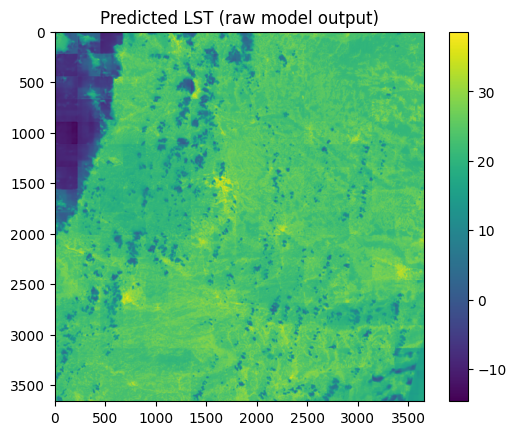

In [12]:
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(pred)
plt.colorbar()
plt.title("Predicted LST (raw model output)")
plt.show()


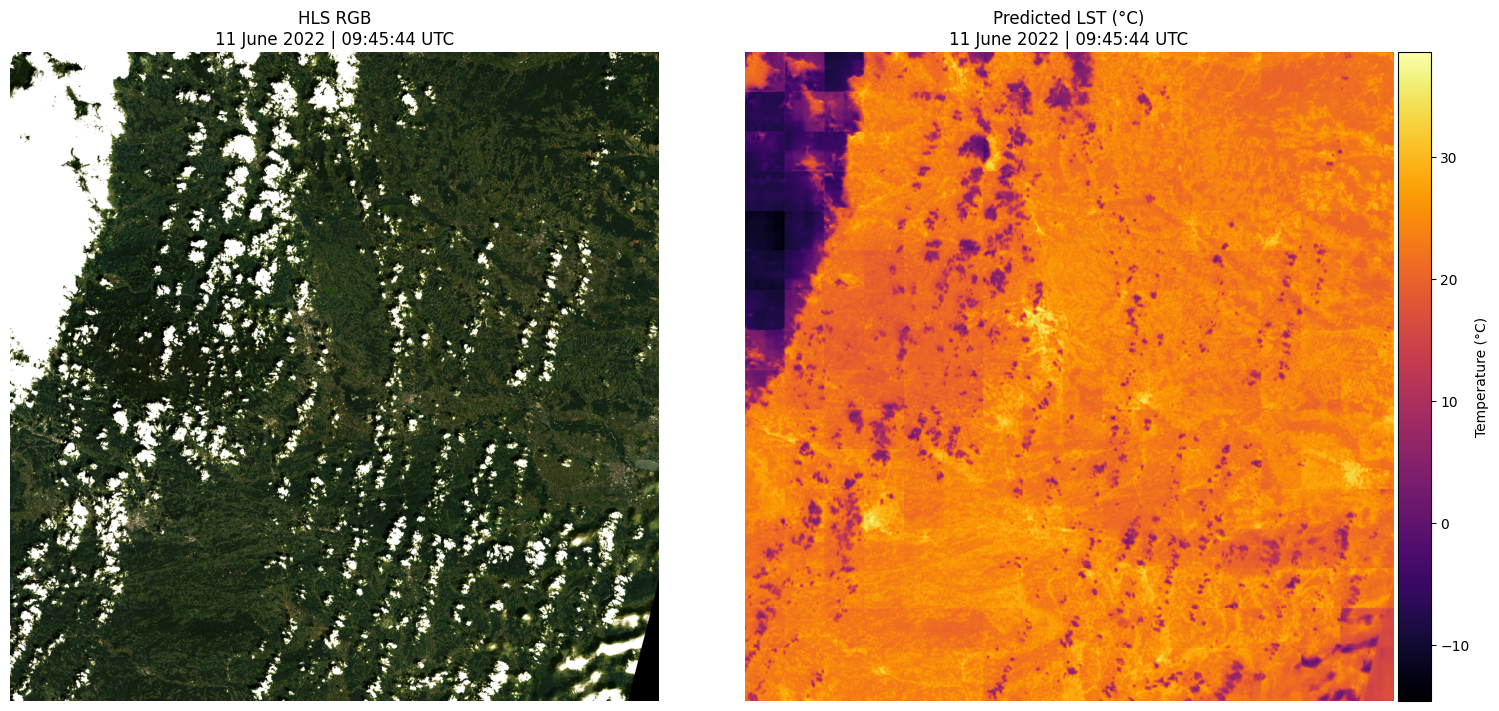

In [16]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
from datetime import datetime




# -----------------------------------
# Paths
# -----------------------------------

rgb_stack_path = r"C:\Users\carellano.LEGION5PRO-O3OB\Documents\GitHub\SR_dataaccess\data_hls_graz\model_inputs_dn\HLS.L30.T33TWM.2022162T094544.v2.0.inputs.tif"

pred_path = rgb_stack_path.replace(".inputs.tif", ".pred.tif")



# --------------------------------------------------
# Extract date from filename
# --------------------------------------------------

filename = rgb_stack_path.split("\\")[-1]
date_part = filename.split(".")[3]  # 2022162T094544

year = int(date_part[:4])
julian = int(date_part[4:7])
time_str = date_part.split("T")[1]

date_obj = datetime.strptime(f"{year}{julian}", "%Y%j")
date_clean = date_obj.strftime("%d %B %Y")
time_clean = f"{time_str[:2]}:{time_str[2:4]}:{time_str[4:6]} UTC"

title_date = f"{date_clean} | {time_clean}"

# -----------------------------------
# Load RGB (Bands 3,2,1 = B04,B03,B02)
# -----------------------------------

with rasterio.open(rgb_stack_path) as src:
    red   = src.read(3)
    green = src.read(2)
    blue  = src.read(1)

# Convert DN → reflectance only for display
rgb = np.stack([red, green, blue], axis=-1).astype(np.float32)
rgb = rgb * 0.0001  # apply scale factor for visualization

# Clip to reasonable reflectance range
rgb = np.clip(rgb, 0, 0.3)
rgb = rgb / 0.3  # normalize 0–1 for plotting

# -----------------------------------
# Load prediction
# -----------------------------------

with rasterio.open(pred_path) as src:
    pred = src.read(1)

# -----------------------------------
# Plot side-by-side
# -----------------------------------

fig, axes = plt.subplots(1, 2, figsize=(15, 7), constrained_layout=True)

axes[0].set_aspect("equal")
axes[1].set_aspect("equal")

axes[0].imshow(rgb)
axes[0].set_title(f"HLS RGB\n{title_date}")
axes[0].axis("off")

im = axes[1].imshow(pred, cmap="inferno")
axes[1].set_title(f"Predicted LST (°C)\n{title_date}")
axes[1].axis("off")

divider = make_axes_locatable(axes[1])
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax, label="Temperature (°C)")

plt.show()